In [1]:
# Reads in a waveguide mode, centers it, and writes out a pkl file with center coords

# Created 2023 Mar 16 by E.S.

In [6]:
import pandas as pd
import numpy as np
import astropy
import os
import pickle
import matplotlib.pyplot as plt
from astropy.modeling import models, functional_models, fitting
from photutils.centroids import centroid_2dg
from matplotlib.patches import Circle

In [3]:
# read in intensity profile (source: Simon)

# Simon:
#The waveguide modes have a 4sigma diameter of 8.3x7.6um. A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
#Both at a wavelength of 1550nm.
#The attached CSV file contains the corresponding intensity profile. The scale is 0.2161um per pixel.

stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/'

mode_file_names = [stem + './data/AF45_100x_Zeiss_300um_1550nm_1000mmmin_67.5nJ.csv', 
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_1000mmmin_77.5nJ.csv', 
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_500mmmin_75nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_750mmmin_50nJ.csv',
                   stem + './data/AF45_100x_Zeiss_300um_1550nm_750mmmin_77.5nJ.csv']

<class 'numpy.ndarray'>


<Figure size 640x480 with 0 Axes>

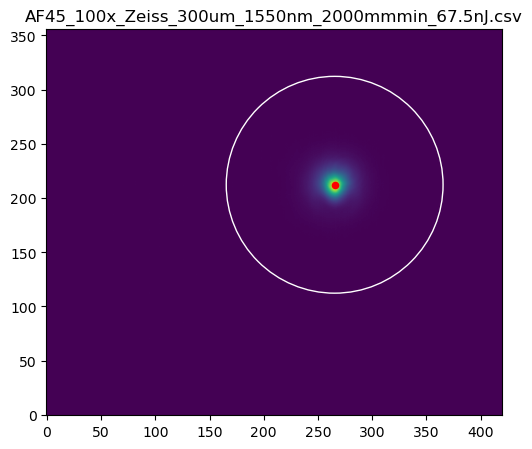

Wrote junk_AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv.pkl


In [15]:
#for file_name in [stem + './data/AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv']: # mode_file_names:
for file_name in mode_file_names:
    
    df_intensity = np.genfromtxt(file_name, delimiter=";")
    
    # kludge to make padding sufficient in file AF45_100x_Zeiss_300um_1550nm_2000mmmin_67.5nJ.csv
    #df_intensity = np.pad(df_intensity, pad_width=50, mode='constant', constant_values=0)

    xycen = centroid_2dg(df_intensity)
    
    circ1 = Circle((xycen[0],xycen[1]),radius=100,color='white',fill=False)
    
    #print('margin from edge:',(np.shape(df_intensity)[0]-xycen[0], np.shape(df_intensity)[1]-xycen[1]))
    
    plt.clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), layout='constrained')
    ax.imshow(df_intensity, origin="lower")
    ax.scatter(xycen[0],xycen[1], color='red', s=20)
    ax.add_patch(circ1)
    ax.set_title(os.path.basename(file_name))
    plt.show()
    
    # pickle
    file_name = 'junk_' + os.path.basename(file_name) + '.pkl'
    
    data_list = [df_intensity,xycen]
    open_file = open(file_name, "wb")
    pickle.dump(data_list, open_file)
    open_file.close()
    
    print('Wrote',file_name)